In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
import seaborn as sns

matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import import_homer_diffgene
from plotting_scripts import plot_exp_rpkm, gene_list_bar_plot

In [2]:
workingDirectory = '/home/h1bennet/strains_rna/results/L06_Strains_Leptin6htoControl_LSEC/'
leptinDirectory = '/home/h1bennet/strains/data/RNA/leptin_6h_strains_lsec/'
controlDirectory = '/home/h1bennet/strains/data/RNA/control_lsec/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)


# Make hub to look at individual files

In [3]:
np.sort(os.listdir(controlDirectory))

array(['AJ_M_LSEC_RNA_AJ01A_HBENN_l20201124_TACCGAGG_CCTGAACT.aj.star_shifted_from_AJ.sam',
       'AJ_M_LSEC_RNA_AJ01B_HBENN_l20201124_CGTTAGAA_TTCAGGTC.aj.star_shifted_from_AJ.sam',
       'AJ_M_LSEC_RNA_AJ01C_HBENN_l20201124_AGCCTCAT_AGTAGAGA.aj.star_shifted_from_AJ.sam',
       'AJ_M_LSEC_RNA_AJ01D_HBENN_l20201124_GATTCTGC_GACGAGAG.aj.star_shifted_from_AJ.sam',
       'BALBC_M_LSEC_RNA_BALB01A_HBENN_l20201124_TCGTAGTG_AGACTTGG.balbcj.star_shifted_from_BALBCJ.sam',
       'BALBC_M_LSEC_RNA_BALB01B_HBENN_l20201124_CTACGACA_GAGTCCAA.balbcj.star_shifted_from_BALBCJ.sam',
       'BALBC_M_LSEC_RNA_BALB01C_HBENN_l20201124_TAAGTGGT_CTTAAGCC.balbcj.star_shifted_from_BALBCJ.sam',
       'BALBC_M_LSEC_RNA_BALB01D_HBENN_l20201124_CGGACAAC_TCCGGATT.balbcj.star_shifted_from_BALBCJ.sam',
       'C57B6J_M_LSEC_RNA_C5701A_HBENN_l20201124_ATATGGAT_CTGTATTA',
       'C57B6J_M_LSEC_RNA_C5701B_HBENN_l20201124_GCGCAAGC_TCACGCCG',
       'C57B6J_M_LSEC_RNA_C5701C_HBENN_l20201124_AAGATACT_ACTTACAT',
     

    makeMultiWigHub.pl hrb_strains_qc_lsec_control_leptin6h_rna mm10 \
    -color 222,45,38 222,45,38 222,45,38 222,45,38 \
    165,15,21 165,15,21 \
    49,130,189 49,130,189 49,130,189 49,130,189 \
    8,81,156 8,81,156 \
    49,163,84 49,163,84 49,163,84 49,163,84 \
    0,109,44 0,109,44 \
    -force -d /home/h1bennet/strains/data/RNA/control_lsec/AJ_M_LSEC_RNA_AJ01A_HBENN_l20201124_TACCGAGG_CCTGAACT.aj.star_shifted_from_AJ.sam \
    /home/h1bennet/strains/data/RNA/control_lsec/AJ_M_LSEC_RNA_AJ01B_HBENN_l20201124_CGTTAGAA_TTCAGGTC.aj.star_shifted_from_AJ.sam \
    /home/h1bennet/strains/data/RNA/control_lsec/AJ_M_LSEC_RNA_AJ01C_HBENN_l20201124_AGCCTCAT_AGTAGAGA.aj.star_shifted_from_AJ.sam \
    /home/h1bennet/strains/data/RNA/control_lsec/AJ_M_LSEC_RNA_AJ01D_HBENN_l20201124_GATTCTGC_GACGAGAG.aj.star_shifted_from_AJ.sam \
    /home/h1bennet/strains/data/RNA/leptin_6h_strains_lsec/aj_M_LSEC_RNA_polyA_leptin_6h_rep1_HBENN_l20210529_AGTACTCC_AACCTGTT.aj.star_shifted_from_AJ.sam \
    /home/h1bennet/strains/data/RNA/leptin_6h_strains_lsec/aj_M_LSEC_RNA_polyA_leptin_6h_rep2_HBENN_l20210529_GACGTCTT_GGTTCACC.aj.star_shifted_from_AJ.sam \
    /home/h1bennet/strains/data/RNA/control_lsec/BALBC_M_LSEC_RNA_BALB01A_HBENN_l20201124_TCGTAGTG_AGACTTGG.balbcj.star_shifted_from_BALBCJ.sam \
    /home/h1bennet/strains/data/RNA/control_lsec/BALBC_M_LSEC_RNA_BALB01B_HBENN_l20201124_CTACGACA_GAGTCCAA.balbcj.star_shifted_from_BALBCJ.sam \
     /home/h1bennet/strains/data/RNA/control_lsec/BALBC_M_LSEC_RNA_BALB01C_HBENN_l20201124_TAAGTGGT_CTTAAGCC.balbcj.star_shifted_from_BALBCJ.sam \
    /home/h1bennet/strains/data/RNA/control_lsec/BALBC_M_LSEC_RNA_BALB01D_HBENN_l20201124_CGGACAAC_TCCGGATT.balbcj.star_shifted_from_BALBCJ.sam \
    /home/h1bennet/strains/data/RNA/leptin_6h_strains_lsec/balbcj_M_LSEC_RNA_polyA_leptin_6h_rep1_HBENN_l20210529_TGCGAGAC_CATTGTTG.balbcj.star_shifted_from_BALBCJ.sam \
    /home/h1bennet/strains/data/RNA/leptin_6h_strains_lsec/balbcj_M_LSEC_RNA_polyA_leptin_6h_rep2_HBENN_l20210529_CATAGAGT_TGCCACCA.balbcj.star_shifted_from_BALBCJ.sam \
    /home/h1bennet/strains/data/RNA/control_lsec/C57B6J_M_LSEC_RNA_C5701A_HBENN_l20201124_ATATGGAT_CTGTATTA \
    /home/h1bennet/strains/data/RNA/control_lsec/C57B6J_M_LSEC_RNA_C5701B_HBENN_l20201124_GCGCAAGC_TCACGCCG \
    /home/h1bennet/strains/data/RNA/control_lsec/C57B6J_M_LSEC_RNA_C5701C_HBENN_l20201124_AAGATACT_ACTTACAT \
    /home/h1bennet/strains/data/RNA/control_lsec/C57B6J_M_LSEC_RNA_C5701D_HBENN_l20201124_GGAGCGTC_GTCCGTGC \
    /home/h1bennet/strains/data/RNA/leptin_6h_strains_lsec/c57bl6j_M_LSEC_RNA_polyA_leptin_6h_rep1_HBENN_l20210529_ACAGGCGC_CTCTGCCT.c57bl6j.star_shifted_from_C57BL6J.sam \
    /home/h1bennet/strains/data/RNA/leptin_6h_strains_lsec/c57bl6j_M_LSEC_RNA_polyA_leptin_6h_rep2_HBENN_l20210529_GTGAATAT_TCTCATTC.c57bl6j.star_shifted_from_C57BL6J.sam

# Run Oyoung's pipeline to process RNA-seq data consistantly.

In [4]:
c57_control_paths = list(np.sort(glob.glob(controlDirectory+'/C57*')))
balbc_control_paths = list(np.sort(glob.glob(controlDirectory+'/BALB*')))
aj_control_paths = list(np.sort(glob.glob(controlDirectory+'/AJ*')))

c57_control_ids = [i.split('/')[-1].split('_')[4] for i in c57_control_paths]
balbc_control_ids = [i.split('/')[-1].split('_')[4] for i in balbc_control_paths]
aj_control_ids = [i.split('/')[-1].split('_')[4] for i in aj_control_paths]

In [5]:
c57_leptin_paths = list(np.sort(glob.glob(leptinDirectory+'/*c57*')))
balbc_leptin_paths = list(np.sort(glob.glob(leptinDirectory+'/*balb*')))
aj_leptin_paths = list(np.sort(glob.glob(leptinDirectory+'/aj*')))

c57_leptin_ids = [i.split('/')[-1].split('_')[7] for i in c57_leptin_paths]
balbc_leptin_ids = [i.split('/')[-1].split('_')[7] for i in balbc_leptin_paths]
aj_leptin_ids = [i.split('/')[-1].split('_')[7] for i in aj_leptin_paths]

Put together into three separate comparisons

In [6]:
ids = ['c57_lsec_control',
       'c57_lsec_leptin_6hours',
       'balbc_lsec_control',
       'balbc_lsec_leptin_6hours',
       'aj_lsec_control',
       'aj_lsec_leptin_6hours'
      ]

colors = ['#74c476',
          '#006d2c',
          '#6baed6',
          '#08519c',
          '#de2d26',
          '#a50f15'
         ]

paths = [';'.join(c57_control_paths),
         ';'.join(c57_leptin_paths),
         ';'.join(balbc_control_paths),
         ';'.join(balbc_leptin_paths),
         ';'.join(aj_control_paths),
         ';'.join(aj_leptin_paths)
        ]

short_ids = [';'.join(c57_control_ids),
             ';'.join(c57_leptin_ids),
             ';'.join(balbc_control_ids),
             ';'.join(balbc_leptin_ids),
             ';'.join(aj_control_ids),
             ';'.join(aj_leptin_ids)
            ]

pd.DataFrame([ids,colors,paths,short_ids]).T.to_csv('./sampleDef.txt',
                                                    sep='\t',
                                                    header=False,
                                                    index=False)

In [7]:
pd.DataFrame([ids,colors,paths,short_ids]).T

,0,1,2,3
0,c57_lsec_control,#74c476,/home/h1bennet/strains/data/RNA/control_lsec/C...,C5701A;C5701B;C5701C;C5701D
1,c57_lsec_leptin_6hours,#006d2c,/home/h1bennet/strains/data/RNA/leptin_6h_stra...,rep1;rep2
2,balbc_lsec_control,#6baed6,/home/h1bennet/strains/data/RNA/control_lsec/B...,BALB01A;BALB01B;BALB01C;BALB01D
3,balbc_lsec_leptin_6hours,#08519c,/home/h1bennet/strains/data/RNA/leptin_6h_stra...,rep1;rep2
4,aj_lsec_control,#de2d26,/home/h1bennet/strains/data/RNA/control_lsec/A...,AJ01A;AJ01B;AJ01C;AJ01D
5,aj_lsec_leptin_6hours,#a50f15,/home/h1bennet/strains/data/RNA/leptin_6h_stra...,rep1;rep2


# Run O'young RNA pipeline

Run the code below in BASH.
Edited for this pipeline to lower the minimum TPM threshold as this has kind of messed up our differential gene calling for borderline genes that do not meet the TPM in two of the strains ie TPM > 8 in one strain and TPM of 7 in the other two.

    source activate r-ouyangPipe
    
    mkdir ./expression/
    
    mkdir ./differential/
    
    alignStats.R ./sampleDef.txt > qcStats.txt
    
    rnaQuan.R ./sampleDef.txt -o ./expression/

    rnaDiff.R ./sampleDef.txt -c ./expression/rawC.txt \
    -t ./expression/rawT.txt -m 4 -o ./differential/

    # annotate scatter files with tag counts
    for scatter in ./differential/*scatter.txt;
    do diff2Homer.R -d $scatter -q ./expression/HOMER.rawTPM.txt;
    done
    
    rm ./differential/aj*balb*
    rm ./differential/aj*c57*
    rm ./differential/balb*aj*
    rm ./differential/balb*c57*
    rm ./differential/c57*aj*
    rm ./differential/c57*balb*

### Make sure to check the PCA pdf file for outliers

## Make jupyter hub for vizualization

    makeMultiWigHub.pl hrb_strains_viz_wholeliver_rna_leptin6h_control_merged mm10 \
    -color 222,45,38 165,15,21 107,174,214 8,81,156 116,196,118 0,109,44 \
    -force -d ./expression/mergeTag/aj_wholeliver_control_young \
    ./expression/mergeTag/aj_wholeliver_leptin_6hours \
    ./expression/mergeTag/balbc_wholeliver_control_young \
    ./expression/mergeTag/balbc_wholeliver_leptin_6hours \
    ./expression/mergeTag/c57_wholeliver_control_young \
    ./expression/mergeTag/c57_wholeliver_leptin_6hours

# Import differential gene files for examination and plotting

Make folder for figures

In [8]:
if not os.path.isdir('./figures/'):
    os.mkdir('./figures')

## Write differential genes to list for metascape

In [9]:
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')

In [10]:
log2fc = np.log2(1.5)
pval = 0.05
gene_list_dict ={}

In [11]:
for i in np.sort(glob.glob('./differential/c57*c57*homer.txt')):
    print(i)
    # read in gene expression data
    df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
        depath=i,
        gepath='./expression/HOMER.rawTPM.txt',
        gene_name_index=True)

    # select differential genes
    df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
    sig_genes = df.index[(df['padj'] < pval) & (df['log2FoldChange'] >= log2fc)].to_list()
    gene_list_dict[i.split('.')[3]+'_up'] = list(sig_genes)
    # print('union set length:', print(len(g_union)))
    # print('intersection set length:', print(len(g_intersect)))

for i in np.sort(glob.glob('./differential/balb*balb*homer.txt')):
    print(i)
    # read in gene expression data
    df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
        depath=i,
        gepath='./expression/HOMER.rawTPM.txt',
        gene_name_index=True)

    # select differential genes
    df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
    sig_genes = df.index[(df['padj'] < pval) & (df['log2FoldChange'] >= log2fc)].to_list()
    gene_list_dict[i.split('.')[3]+'_up'] = list(sig_genes)
    # print('union set length:', print(len(g_union)))
    # print('intersection set length:', print(len(g_intersect)))
    
for i in np.sort(glob.glob('./differential/aj*aj*homer.txt')):
    print(i)
    # read in gene expression data
    df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
        depath=i,
        gepath='./expression/HOMER.rawTPM.txt',
        gene_name_index=True)

    # select differential genes
    df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
    sig_genes = df.index[(df['padj'] < pval) & (df['log2FoldChange'] >= log2fc)].to_list()
    gene_list_dict[i.split('.')[3]+'_up'] = list(sig_genes)
    # print('union set length:', print(len(g_union)))
    # print('intersection set length:', print(len(g_intersect)))

./differential/c57_lsec_control.vs.c57_lsec_leptin_6hours.scatter.homer.txt
ge all transcripts (24940, 25)
Diff Gene selected transcripts (10317, 14)
ge selected transcripts (10317, 25)
./differential/c57_lsec_leptin_6hours.vs.c57_lsec_control.scatter.homer.txt
ge all transcripts (24940, 25)
Diff Gene selected transcripts (10317, 14)
ge selected transcripts (10317, 25)
./differential/balbc_lsec_control.vs.balbc_lsec_leptin_6hours.scatter.homer.txt
ge all transcripts (24940, 25)
Diff Gene selected transcripts (10187, 14)
ge selected transcripts (10187, 25)
./differential/balbc_lsec_leptin_6hours.vs.balbc_lsec_control.scatter.homer.txt
ge all transcripts (24940, 25)
Diff Gene selected transcripts (10187, 14)
ge selected transcripts (10187, 25)
./differential/aj_lsec_control.vs.aj_lsec_leptin_6hours.scatter.homer.txt
ge all transcripts (24940, 25)
Diff Gene selected transcripts (10277, 14)
ge selected transcripts (10277, 25)
./differential/aj_lsec_leptin_6hours.vs.aj_lsec_control.scatter.

In [12]:
for key in gene_list_dict.keys():
    print(key)
    print(len(gene_list_dict[key]), 'genes')
    with open('./gene_lists/'+key+'_wholeliver_genes_fc_%.2f_pval_%.2f_.txt' % (log2fc, pval), 'w') as f:
        f.write('Gene\n')
        for i in gene_list_dict[key]:
            f.write(i+'\n')
        f.close()

c57_lsec_leptin_6hours_up
99 genes
c57_lsec_control_up
293 genes
balbc_lsec_leptin_6hours_up
231 genes
balbc_lsec_control_up
142 genes
aj_lsec_leptin_6hours_up
62 genes
aj_lsec_control_up
56 genes


# How many leptin induced genes are common

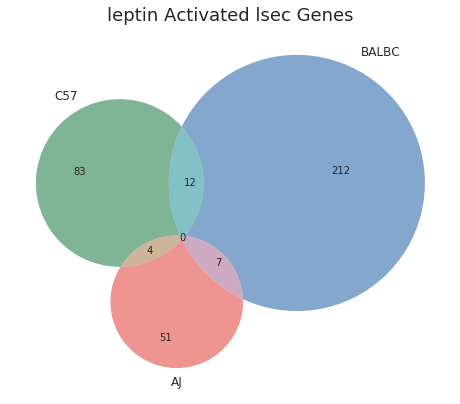

In [15]:
fig, ax = plt.subplots(figsize=(8,8))

# venn3 accepts a list with the following order
# (100, 010, 110, 001, 101, 011, 111)
# group1, group2, group1+2, group3, group1+3, group2+3, group3
venn3(subsets=[set(gene_list_dict['c57_lsec_leptin_6hours_up']),
               set(gene_list_dict['balbc_lsec_leptin_6hours_up']),
               set(gene_list_dict['aj_lsec_leptin_6hours_up'])],
     ax=ax,
     set_colors=('#006d2c', '#08519c', '#de2d26'),
     set_labels=('C57', 'BALBC', 'AJ'),
     alpha=0.5)
ax.set_title('leptin Activated lsec Genes');

plt.savefig('./figures/venn2_activated_genes.png', bbox_inches='tight')

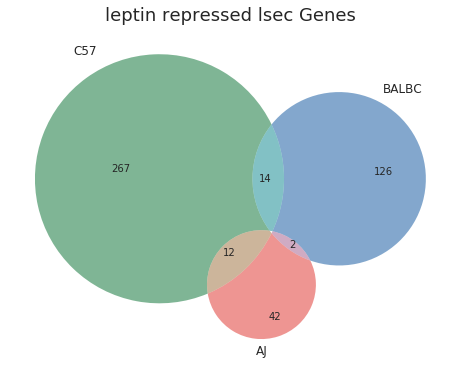

In [16]:
fig, ax = plt.subplots(figsize=(8,8))

# venn3 accepts a list with the following order
# (100, 010, 110, 001, 101, 011, 111)
# group1, group2, group1+2, group3, group1+3, group2+3, group3
venn3(subsets=[set(gene_list_dict['c57_lsec_control_up']),
               set(gene_list_dict['balbc_lsec_control_up']),
               set(gene_list_dict['aj_lsec_control_up'])],
     ax=ax,
     set_colors=('#006d2c', '#08519c', '#de2d26'),
     set_labels=('C57', 'BALBC', 'AJ'),
     alpha=0.5)
ax.set_title('leptin repressed lsec Genes');

plt.savefig('./figures/venn2_activated_genes.png', bbox_inches='tight')

### Pull sets for manual examination

activated genes

In [34]:
all3 = set(gene_list_dict['aj_lsec_leptin_6hours_up']).intersection(set(gene_list_dict['balbc_lsec_leptin_6hours_up']).intersection(gene_list_dict['c57_lsec_leptin_6hours_up']))
C57_balbc = set(gene_list_dict['c57_lsec_leptin_6hours_up']).intersection(set(gene_list_dict['balbc_lsec_leptin_6hours_up']).difference(all3))
C57_aj = set(gene_list_dict['c57_lsec_leptin_6hours_up']).intersection(set(gene_list_dict['aj_lsec_leptin_6hours_up']).difference(all3))
balbc_aj = set(gene_list_dict['balbc_lsec_leptin_6hours_up']).intersection(gene_list_dict['aj_lsec_leptin_6hours_up']).difference(all3)
C57_private = set(gene_list_dict['c57_lsec_leptin_6hours_up']).difference(set(all3).union(set(C57_balbc).union(C57_aj)))
balbc_private = set(gene_list_dict['balbc_lsec_leptin_6hours_up']).difference(set(all3).union(set(C57_balbc).union(balbc_aj)))
aj_private = set(gene_list_dict['aj_lsec_leptin_6hours_up']).difference(set(all3).union(set(C57_aj).union(balbc_aj)))

In [38]:
genesets = [aj_private, C57_private, balbc_private]
genesetnames = ['aj_private', 'c57_private', 'balbc_private']
for listname, genelist in zip(genesetnames, genesets):
    with open('./gene_lists/'+listname+'_wholeliver_genes_fc_'+str(log2fc)+'_pval_'+str(pval)+'.txt', 'w') as f:
        f.write('Gene\n')
        for i in genelist:
            f.write(i+'\n')
        f.close()

# Plot potential nichenet ligands

In [39]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

In [40]:
ligands = pd.read_csv('/home/h1bennet/data/gene_lists/nichenet_ligands.txt',
                      sep='\t')['x'].str.capitalize().tolist()
ligands[:5]

['Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl5', 'Ppbp']

Collect ALL activated NASH genes

In [20]:
leptin_act = []
for key in gene_list_dict.keys():
    if 'leptin' in key:
        leptin_act.extend(gene_list_dict[key])

leptin_act = set(leptin_act)

Assess for overlap with ligands

In [21]:
leptin_act_ligands = leptin_act.intersection(ligands)

## Plot for all samples

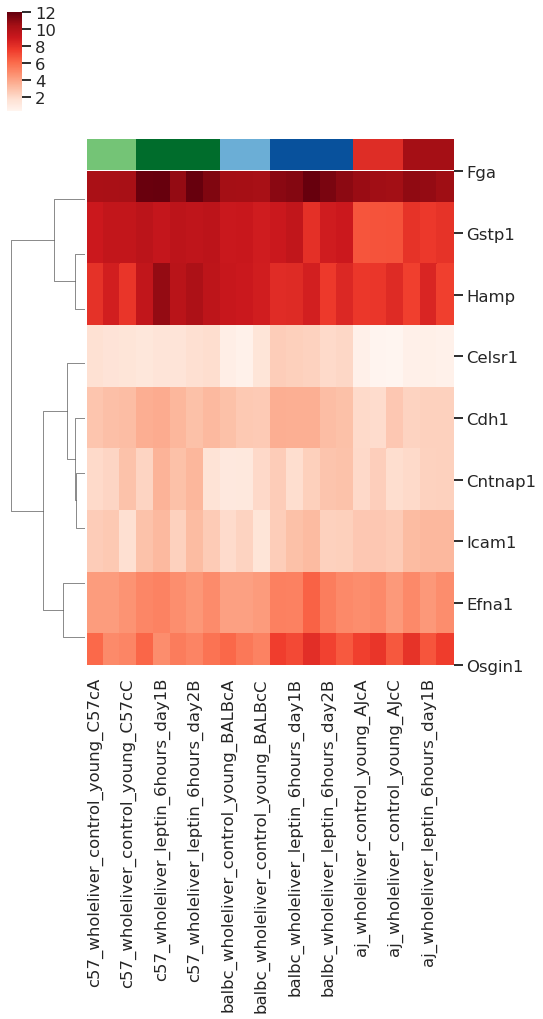

In [22]:
sns.clustermap(
    np.log2(tpm_mat.loc[leptin_act_ligands]+1),
    col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    vmax=12,
    col_colors = ['#74c476', '#74c476', '#74c476',
          '#006d2c', '#006d2c', '#006d2c', '#006d2c', '#006d2c',
          '#6baed6', '#6baed6', '#6baed6',
          '#08519c', '#08519c', '#08519c', '#08519c', '#08519c',
          '#de2d26', '#de2d26', '#de2d26',
          '#a50f15', '#a50f15', '#a50f15'],
    figsize=(8,12),
    yticklabels=1)

plt.savefig('./figures/diff_genes_ligands_clustermap.png', bbox_inches='tight')
# plt.close()

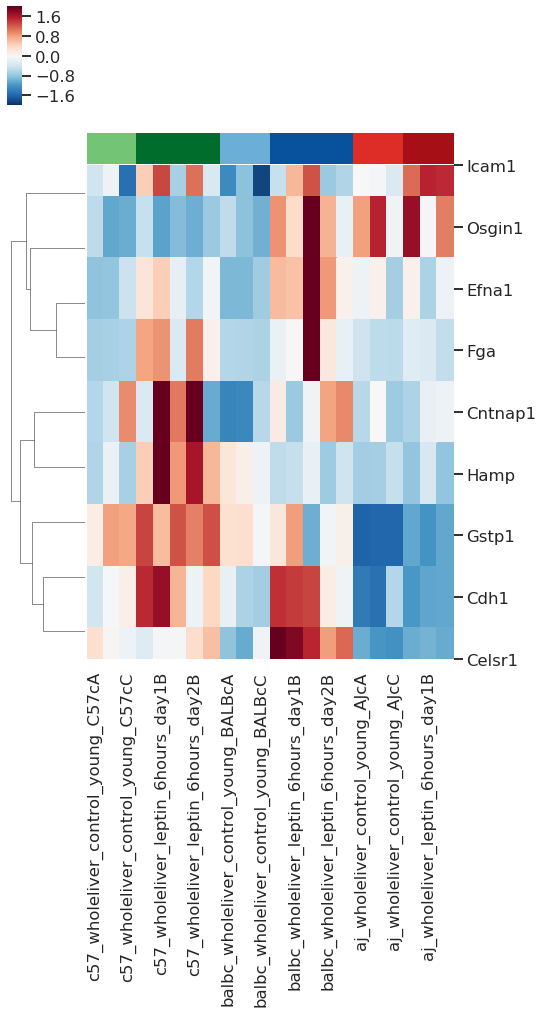

In [23]:
sns.clustermap(
    tpm_mat.loc[leptin_act_ligands],
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    col_colors = ['#74c476', '#74c476', '#74c476',
          '#006d2c', '#006d2c', '#006d2c', '#006d2c', '#006d2c',
          '#6baed6', '#6baed6', '#6baed6',
          '#08519c', '#08519c', '#08519c', '#08519c', '#08519c',
          '#de2d26', '#de2d26', '#de2d26',
          '#a50f15', '#a50f15', '#a50f15'],
    figsize=(8,12),
    yticklabels=1)

plt.savefig('./figures/diff_genes_ligands_clustermap_zscore.png', bbox_inches='tight')
# plt.close()

## Plot Strain Specific Ligands

In [24]:
all_strain_spec = C57_private.union(aj_private).union(balbc_private)
all_strain_spec_ligands = all_strain_spec.intersection(ligands)

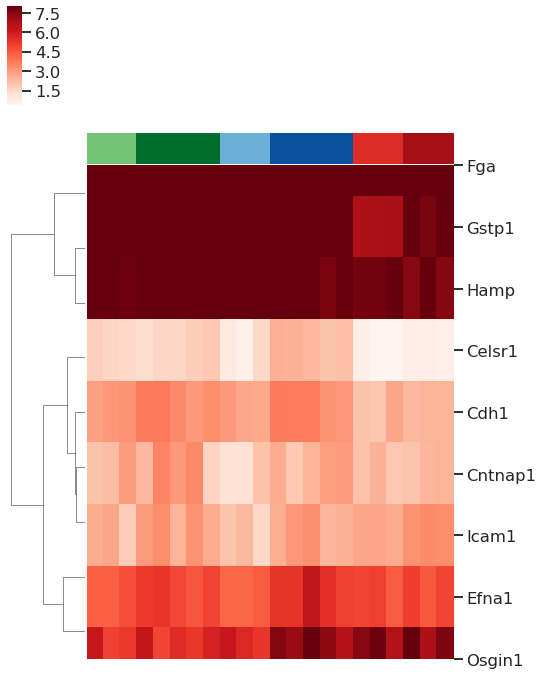

In [26]:
sns.clustermap(
    np.log2(tpm_mat.loc[all_strain_spec_ligands]+1),
    col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    vmax=8,
    col_colors = ['#74c476', '#74c476', '#74c476',
          '#006d2c', '#006d2c', '#006d2c', '#006d2c', '#006d2c',
          '#6baed6', '#6baed6', '#6baed6',
          '#08519c', '#08519c', '#08519c', '#08519c', '#08519c',
          '#de2d26', '#de2d26', '#de2d26',
          '#a50f15', '#a50f15', '#a50f15'],
    figsize=(8,12),
    yticklabels=1,
    xticklabels=0)

plt.savefig('./figures/diff_genes_strainspecligands_clustermap.png',
            bbox_inches='tight')
# plt.close()

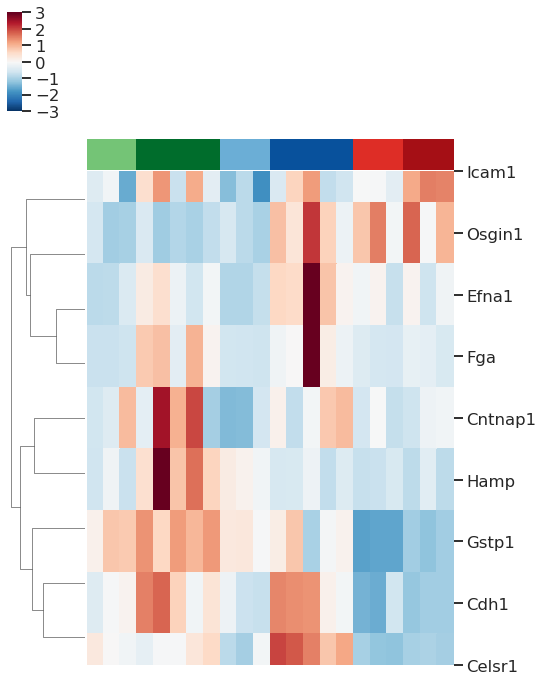

In [27]:
sns.clustermap(
    tpm_mat.loc[all_strain_spec_ligands],
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-3,
    vmax=3,
    col_colors = ['#74c476', '#74c476', '#74c476',
          '#006d2c', '#006d2c', '#006d2c', '#006d2c', '#006d2c',
          '#6baed6', '#6baed6', '#6baed6',
          '#08519c', '#08519c', '#08519c', '#08519c', '#08519c',
          '#de2d26', '#de2d26', '#de2d26',
          '#a50f15', '#a50f15', '#a50f15'],
    figsize=(8,12),
    yticklabels=1,
    xticklabels=0)

plt.savefig('./figures/diff_genes_strainspecligands_clustermap_zscore.png',
            bbox_inches='tight')
# plt.close()

# Plot specific genes as barplots

In [28]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

In [29]:
tpm_mat.shape

(23608, 22)

In [30]:
groups = [[0,1,2],
          [3,4,5,6,7],
          [8,9,10],
          [11,12,13,14],
          [15,16,17],
          [18,19,20,21]]

group_labels = ['C57BL/6J wholeliver Control young',
                'C57BL/6J wholeliver leptin 6 hours',
                'Balb/cJ wholeliver Control young',
                'Balb/cJ wholeliver leptin 6 hours',
                'AJ wholeliver Control young',
                'AJ wholeliver leptin 6 hours',]

colors = ['#74c476',
          '#006d2c',
          '#6baed6',
          '#08519c',
          '#de2d26',
          '#a50f15']

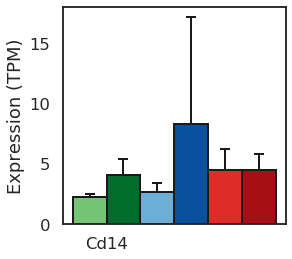

In [33]:
fig, ax = plt.subplots(figsize=(4, 4))

gene_list_bar_plot(['Cd14'],
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   width = 0.15,
                   ax=ax)

ax.get_legend().remove()

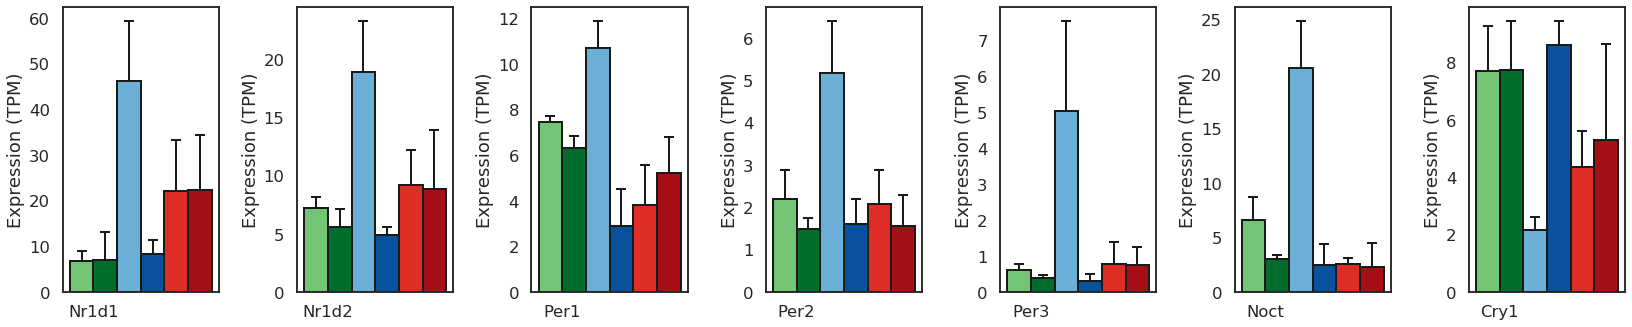

In [64]:
gene_list = ['Nr1d1', 'Nr1d2', 'Per1', 'Per2', 'Per3', 'Noct', 'Cry1']

fig, axs = plt.subplots(1, len(gene_list), figsize=(4*len(gene_list), 3*len(gene_list)/4))
plt.subplots_adjust(wspace=0.5)


for gene, ax in zip(gene_list, axs.flat):
    gene_list_bar_plot([gene],
                       tpm_mat,
                       groups=groups,
                       group_labels = group_labels,
                       colors = colors,
                       width = 0.15,
                       ax=ax)

    ax.get_legend().remove()

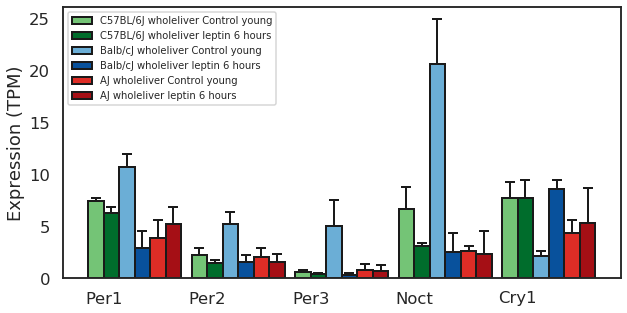

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))

gene_list_bar_plot(['Per1', 'Per2', 'Per3', 'Noct', 'Cry1'],
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   width = 0.15,
                   ax=ax)

# ax.get_legend().remove()

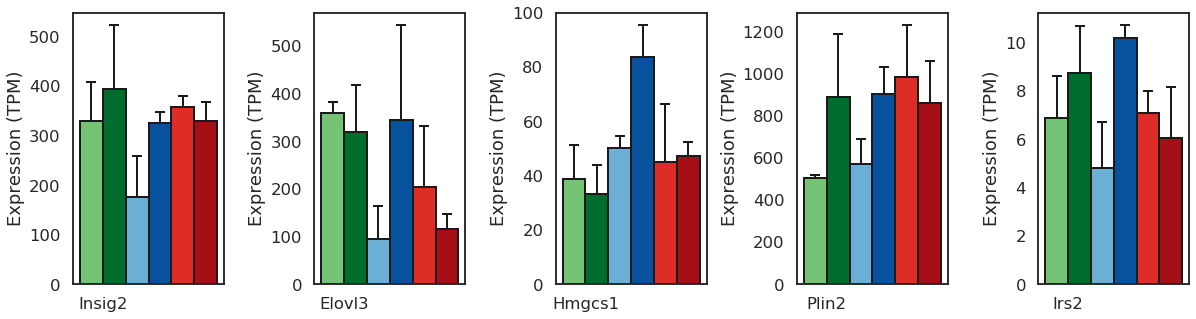

In [59]:
gene_list = ['Nr1d1', 'Elovl3', 'Hmgcs1', 'Plin2', 'Irs2']

fig, axs = plt.subplots(1, len(gene_list), figsize=(4*len(gene_list), len(gene_list)))
plt.subplots_adjust(wspace=0.6)


for gene, ax in zip(gene_list, axs.flat):
    gene_list_bar_plot([gene],
                       tpm_mat,
                       groups=groups,
                       group_labels = group_labels,
                       colors = colors,
                       width = 0.15,
                       ax=ax)

    ax.get_legend().remove()

# Look at expression across hepatic niche

In [68]:
avg_tpm_df = pd.read_csv('/home/h1bennet/strains_rna/results/A00_Strains_Control_WholeLiver_RNA/hepatic_cells_average_tpm.txt',
                  sep='\t', index_col=0)

In [69]:
clock = ['Nr1d1', 'Nr1d2', 'Noct', 'Per1', 'Per2', 'Per3']

In [70]:
avg_tpm_df.loc[clock, :]

,aj_hepatocyte,balbc_hepatocyte,c57_hepatocyte,aj_kupffer,balbc_kupffer,c57_kupffer,aj_lsec,balbc_lsec,c57_lsec,aj_stellate,balbc_stellate,c57_stellate
Nr1d1,26.801,8.8185,69.536000,3.4085,2.8600,3.7215,13.20700,12.78950,9.95375,24.4900,19.63525,8.715000
Nr1d2,23.659,20.1675,26.139667,10.5630,7.0265,10.0680,5.04475,6.01250,4.98375,7.9000,9.39125,8.057333
Noct,42.234,53.5835,16.662000,16.3400,18.2925,35.0065,5.49875,7.01800,5.06075,5.0655,2.09975,5.423000
Per1,26.233,13.8105,19.065000,11.0320,54.5190,49.2475,23.51550,32.46075,35.28725,30.5420,51.24725,46.553333
Per2,16.036,18.4890,10.931333,4.8880,4.7230,7.0700,22.68850,19.48125,41.14025,11.0525,7.72900,27.018333
Per3,10.293,9.8245,7.231333,3.9295,3.2210,4.3725,4.21750,5.56600,7.38375,3.0265,2.99000,5.262667


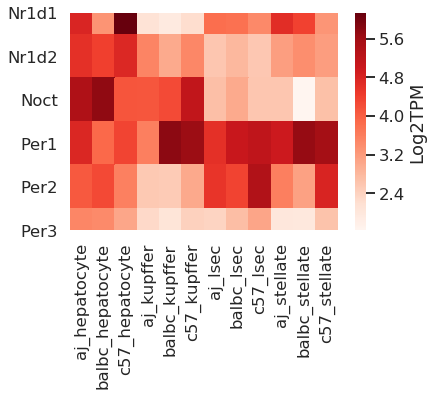

In [71]:
sns.heatmap(
    np.log2(avg_tpm_df.loc[clock, :]+1),
    #col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    #vmax=8,
    # figsize=(8,8),
    cbar_kws={'label':'Log2TPM'},
    yticklabels=1)

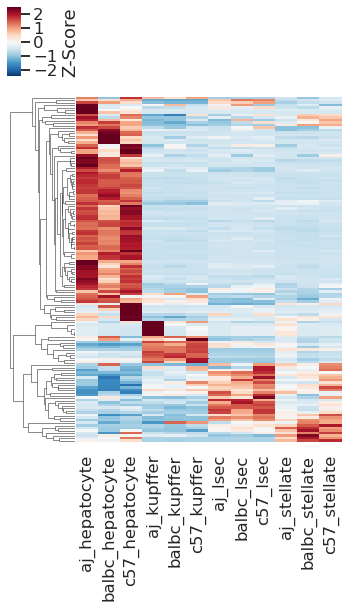

In [155]:
sns.clustermap(
    avg_tpm_df.loc[gene_list_dict['balbc_wholeliver_control_young_up'], :],
    col_cluster=False,
    cmap='RdBu_r',
    z_score=0,
    vmin=-2.5,
    vmax=2.5,
   cbar_kws={'label':'Z-Score'},
    figsize=(6,8),
    yticklabels=0)

# Plot custom differential gene expression

In [13]:
comps = ['aj_lsec_control.vs.aj_lsec_leptin_6hours.scatter.homer.txt',
         'balbc_lsec_control.vs.balbc_lsec_leptin_6hours.scatter.homer.txt',
         'c57_lsec_control.vs.c57_lsec_leptin_6hours.scatter.homer.txt']

ids = [['AJ.*20201124*', 'aj.*leptin_6h'],
       ['BALB.*20201124*', 'balb.*leptin_6h'],
       ['C57.*20201124*', 'c57.*leptin_6h']]

labels = [['AJ control', 'AJ Leptin 6hours'],
          ['BALBcJ control', 'BALBcJ Leptin 6hours'],
          ['C57Bl6J control', 'C57Bl6J Leptin 6hours']]

colors = [['#bdbdbd', '#a50f15'],
          ['#bdbdbd', '#08519c'],
          ['#bdbdbd', '#006d2c']]

# set plotting thresholds
pthresh = 0.05
fontsize=10
labelsize=10
lfcthresh = (np.log2(1.5),2)
dotsize = 1
ax_max = 16
n_yticks = 5
ytickstep = 3
color = '#636363'
filename='leptin_treatment_combined_scatter.png'

aj_lsec_control.vs.aj_lsec_leptin_6hours.scatter.homer.txt
ge all transcripts (24940, 25)
Diff Gene selected transcripts (10277, 14)
ge selected transcripts (10277, 25)
9939 peaks
66 genes up in group 1
56 genes up in group 2
balbc_lsec_control.vs.balbc_lsec_leptin_6hours.scatter.homer.txt
ge all transcripts (24940, 25)
Diff Gene selected transcripts (10187, 14)
ge selected transcripts (10187, 25)
8836 peaks
238 genes up in group 1
147 genes up in group 2
c57_lsec_control.vs.c57_lsec_leptin_6hours.scatter.homer.txt
ge all transcripts (24940, 25)
Diff Gene selected transcripts (10317, 14)
ge selected transcripts (10317, 25)
9553 peaks
102 genes up in group 1
296 genes up in group 2


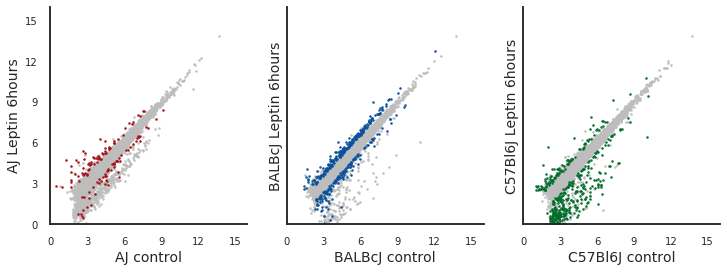

In [14]:
fig, axs = plt.subplots(1,3,
                        figsize=(12,4),
                        sharex=True,
                        sharey=True)
plt.subplots_adjust(wspace=0.2,
                    hspace=0.2)

# set count for labeling axes
count=0

for comp, grep, labs, color, ax in zip(comps, ids, labels, colors, axs.reshape(-1)):
    print(comp)
    de, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
        './differential/'+comp,
        './expression/HOMER.rawTPM.txt',
        gene_name_index=True)
    
    # extract columns
    g0 = tpm_mat.columns.str.contains(grep[0])
    g1 = tpm_mat.columns.str.contains(grep[1])
    col = g0 | g1
    
    de['logtpm'] = np.log2(tpm_mat.loc[:, col].mean(1)+1)
    de['log10p'] = -np.log10(de.padj + 10**(-50))
    de['g0_mean'] = np.log2(tpm_mat.loc[:, g0].mean(1)+1)
    de['g1_mean'] = np.log2(tpm_mat.loc[:, g1].mean(1)+1)
       
    # plot group by group scatter:
    de_nonsig = de.reindex(de.index[de.padj >= pthresh])
    de_sig_fc1 = de.reindex(de.index[(de.padj < pthresh) & (np.abs(de.log2FoldChange) >= lfcthresh[0])])
    
    # check number of peaks in each group
    print(de_nonsig.shape[0], 'peaks')
    print((de_sig_fc1.log2FoldChange > lfcthresh[0]).sum(), 'genes up in group 1')
    print((de_sig_fc1.log2FoldChange < -lfcthresh[0]).sum(), 'genes up in group 2')
    
    for df, c in zip([de_nonsig, de_sig_fc1],
                     color):
        ax.scatter(
            x=df.g0_mean,
            y=df.g1_mean,
            c=c,
            s=dotsize,
            #rasterized=True
        )
     
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    

    ax.set_xlabel(labs[0], fontsize=labelsize+4)
    ax.set_ylabel(labs[1], fontsize=labelsize+4)
    
    #set max and min
    ax.set_xlim([0,ax_max])
    ax.set_ylim([0,ax_max])
    
    # set ticks
    ax.set_xticks(np.arange(0,ax_max,ytickstep))
    ax.set_xticklabels(np.arange(0,ax_max,ytickstep),
                       fontdict={'fontsize':labelsize})
    ax.set_yticks(np.arange(0,ax_max,ytickstep))
    ax.set_yticklabels(np.arange(0,ax_max,ytickstep),
                       fontdict={'fontsize':labelsize})
    
    count = count + 1
plt.savefig('./figures/'+filename, bbox_inches='tight')